In [1]:
%matplotlib inline

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import pandas as pd

Exercise: If you did the exercises in the previous chapter, you downloaded the historical price of BitCoins and estimated the power spectrum of the price changes. Using the same data, compute the autocorrelation of BitCoin prices. Does the autocorrelation function drop off quickly? Is there evidence of periodic behavior?


In [24]:
# BitCoin
url= 'https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?'\
    +'period1=1410912000&period2=1588464000&interval=1d&events=history'

df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [25]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2051,2020-04-29,7806.712402,8871.753906,7786.049316,8801.038086,8801.038086,60201052202
2052,2020-04-30,8797.669922,9440.650391,8533.255859,8658.553711,8658.553711,66964629541
2053,2020-05-01,8672.782227,9048.023438,8667.763672,8864.766602,8864.766602,44068389996
2054,2020-05-02,8869.057617,9007.187500,8811.366211,8988.596680,8988.596680,40134388683
2055,2020-05-03,8983.614258,9167.781250,8830.971680,8897.468750,8897.468750,47101785174


In [26]:
ys= df.Close.values  #[ -2500:] # nearest 10000 days /250 = 40 years
pr= df.Volume.values #[-2500:]  

In [27]:
np.mean(ys), np.average(ys) , np.average(ys, weights=pr)

(4021.0439852125487, 4021.0439852125487, 8267.02325585995)

In [28]:
df['Close'].describe()

count     2056.000000
mean      4021.043985
std       3983.289394
min        178.102997
25%        421.629249
50%       2669.770019
75%       7271.351318
max      19497.400391
Name: Close, dtype: float64

In [29]:
df['Close'].boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

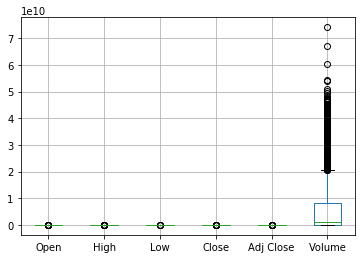

In [30]:
df[-2500:].boxplot()

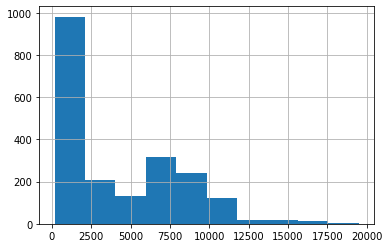

In [31]:
df[-2500:]['Close'].hist()

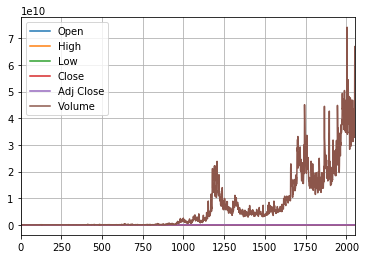

In [32]:
df.plot(grid=True)

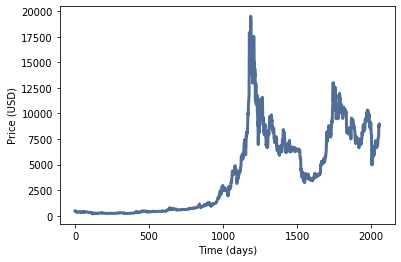

In [33]:
wave = thinkdsp.Wave(ys, framerate=1)
wave.plot()
thinkplot.config(xlabel='Time (days)',
                 ylabel='Price (USD)')

In [34]:
from pandas import autocorr

lags, corrs = autocorr(wave)
thinkplot.plot(lags, corrs)
thinkplot.config(xlabel='Lag',
                 ylabel='Correlation')

ImportError: cannot import name 'autocorr' from 'pandas' (D:\Anaconda3\lib\site-packages\pandas\__init__.py)

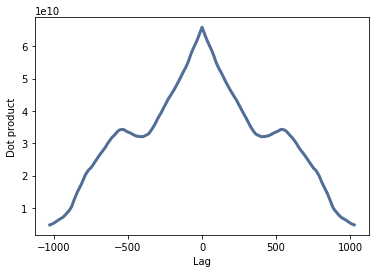

In [35]:
N = len(wave)
corrs2 = np.correlate(wave.ys, wave.ys, mode='same')
lags = np.arange(-N//2, N//2)
thinkplot.plot(lags, corrs2)
thinkplot.config(xlabel='Lag',
                 ylabel='Dot product')

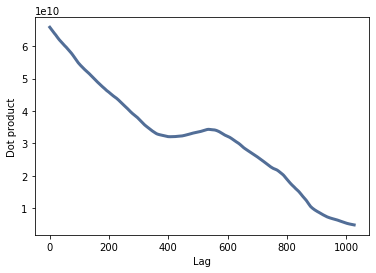

In [36]:
N = len(corrs2)
half = corrs2[N//2:]
thinkplot.plot(half)
thinkplot.config(xlabel='Lag',
                 ylabel='Dot product')

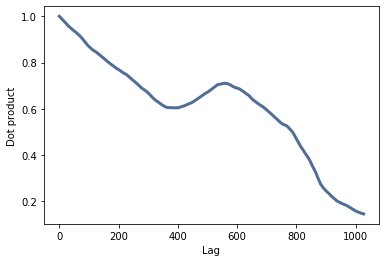

In [37]:
lengths = range(N, N//2, -1)
half /= lengths
half /= half[0]
thinkplot.plot(half)
thinkplot.config(xlabel='Lag',
                 ylabel='Dot product')

In [38]:
thinkplot.preplot(2)
thinkplot.plot(corrs, label='autocorr')
thinkplot.plot(half, label='correlate')
thinkplot.config(xlabel='Lag', ylabel='Correlation')

NameError: name 'corrs' is not defined

<Figure size 432x288 with 0 Axes>

Exercise: The example code in chap05.ipynb shows how to use autocorrelation to estimate the fundamental frequency of a periodic signal. Encapsulate this code in a function called estimate_fundamental, and use it to track the pitch of a recorded sound.

In [40]:
wave = thinkdsp.read_wave('jazz-piano-intro.wav')
wave.normalize()
wave.make_audio()

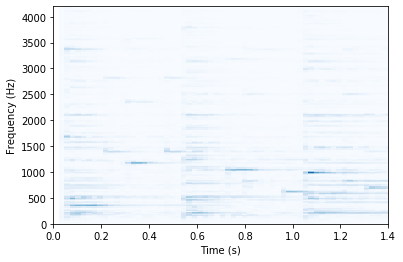

In [41]:
wave.make_spectrogram(2048).plot(high=4200)
thinkplot.config(xlabel='Time (s)', 
                     ylabel='Frequency (Hz)',
                     xlim=[0, 1.4],
                     ylim=[0, 4200])

In [42]:
def estimate_fundamental(segment, low=70, high=150):
    lags, corrs = autocorr(segment)
    lag = np.array(corrs[low:high]).argmax() + low
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

In [43]:
duration = 0.01
segment = wave.segment(start=0.2, duration=duration)
freq = estimate_fundamental(segment)
freq

NameError: name 'autocorr' is not defined

In [44]:
step = 0.05
starts = np.arange(0.0, 1.4, step)

ts = []
freqs = []

for start in starts:
    ts.append(start + step/2)
    segment = wave.segment(start=start, duration=duration)
    freq = estimate_fundamental(segment)
    freqs.append(freq)

NameError: name 'autocorr' is not defined

ValueError: x and y must have same first dimension, but have shapes (1,) and (0,)

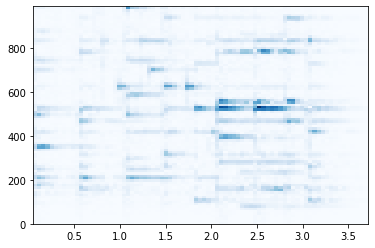

In [45]:
wave.make_spectrogram(4096).plot(high=1000)
thinkplot.plot(ts, freqs, color='r')
thinkplot.config(xlabel='Time (s)', 
                     ylabel='Frequency (Hz)',
                     xlim=[0, 1.4],
                     ylim=[0, 1000])